In [35]:
# ===================================================================
# PROJECT: Facebook Metrics Analysis
# AUTHOR: Senior Data Analyst
# DATE: 2024-12-19
# DESCRIPTION: Social media engagement optimization and prediction
# ===================================================================

# Core Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine Learning & Statistics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from scipy.stats import ttest_ind

# Data Loading
from ucimlrepo import fetch_ucirepo
import os

# Professional Plotting Configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

# Custom color palette for brand consistency
BRAND_COLORS = {
    'primary': '#FF6B6B',
    'secondary': '#4ECDC4', 
    'accent': '#45B7D1',
    'warning': '#FFA726',
    'success': '#66BB6A',
    'neutral': '#78909C'
}

print("🎯 Facebook Metrics Analysis Environment Ready!")
print("📊 Libraries loaded and configured for professional analysis")
print("🎨 Custom styling applied for enhanced visualizations")


🎯 Facebook Metrics Analysis Environment Ready!
📊 Libraries loaded and configured for professional analysis
🎨 Custom styling applied for enhanced visualizations


In [36]:
# =====================================
# DATA LOADING & VALIDATION
# =====================================

def load_facebook_data():
    """
    Load Facebook Metrics dataset with comprehensive validation
    """
    try:
        print("🔄 Loading Facebook Metrics dataset from UCI ML Repository...")
        
        # Try to load from saved file first (faster)
        if os.path.exists('data/raw/facebook_metrics.csv'):
            print("📂 Loading from saved file...")
            df = pd.read_csv('data/raw/facebook_metrics.csv')
            print("✅ Loaded from local file!")
        else:
            # Fetch from UCI repository
            print("🌐 Fetching from UCI repository...")
            facebook_metrics = fetch_ucirepo(id=368)
            
            # Combine features and targets
            X = facebook_metrics.data.features
            y = facebook_metrics.data.targets
            df = pd.concat([X, y], axis=1)
            
            # Save for future use
            os.makedirs('data/raw', exist_ok=True)
            df.to_csv('data/raw/facebook_metrics.csv', index=False)
            print("💾 Dataset saved for future use!")
        
        return df, True
        
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        return None, False

# Load the dataset
df, success = load_facebook_data()

if success:
    print(f"\n🎯 DATASET SUCCESSFULLY LOADED!")
    print("="*50)
    print(f"📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"📅 Time Period: 2014 Facebook posts")
    print(f"🏢 Source: Renowned cosmetics brand")
    print(f"📈 Analysis Ready: {df.shape[0]:,} posts available for analysis")
    
    # Professional data overview
    print(f"\n📋 COLUMN STRUCTURE")
    print("-" * 30)
    
    # Categorize columns by type
    engagement_cols = ['like', 'share', 'comment', 'Total Interactions']
    timing_cols = ['Post Month', 'Post Weekday', 'Post Hour']
    content_cols = ['Type', 'Category', 'Paid']
    reach_cols = [col for col in df.columns if 'reach' in col.lower() or 'impression' in col.lower()]
    
    print(f"🎯 Engagement Metrics ({len(engagement_cols)}): {', '.join(engagement_cols)}")
    print(f"⏰ Timing Features ({len(timing_cols)}): {', '.join(timing_cols)}")
    print(f"📝 Content Features ({len(content_cols)}): {', '.join(content_cols)}")
    print(f"📊 Reach Metrics ({len(reach_cols)}): {len(reach_cols)} columns")
    
    # Display sample data with proper formatting
    print(f"\n🔍 SAMPLE DATA (First 3 Rows)")
    print("=" * 80)
    display(df.head(3))
    
else:
    print("❌ Failed to load dataset. Please check your internet connection.")


🔄 Loading Facebook Metrics dataset from UCI ML Repository...
📂 Loading from saved file...
✅ Loaded from local file!

🎯 DATASET SUCCESSFULLY LOADED!
📊 Dataset Shape: 500 rows × 19 columns
📅 Time Period: 2014 Facebook posts
🏢 Source: Renowned cosmetics brand
📈 Analysis Ready: 500 posts available for analysis

📋 COLUMN STRUCTURE
------------------------------
🎯 Engagement Metrics (4): like, share, comment, Total Interactions
⏰ Timing Features (3): Post Month, Post Weekday, Post Hour
📝 Content Features (3): Type, Category, Paid
📊 Reach Metrics (4): 4 columns

🔍 SAMPLE DATA (First 3 Rows)


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80


In [37]:
# =====================================
# COMPREHENSIVE DATA QUALITY ASSESSMENT  
# =====================================

def perform_data_quality_check(df):
    """
    Comprehensive data quality assessment for business insights
    """
    print("🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT")
    print("=" * 60)
    
    # 1. Missing Values Analysis
    missing_analysis = df.isnull().sum()
    missing_pct = (missing_analysis / len(df) * 100).round(2)
    
    print(f"📊 MISSING VALUES ANALYSIS")
    print("-" * 30)
    if missing_analysis.sum() == 0:
        print("✅ Excellent! No missing values detected")
        data_quality_score = 100
    else:
        print(f"⚠️  Total missing values: {missing_analysis.sum():,}")
        missing_df = pd.DataFrame({
            'Column': missing_analysis[missing_analysis > 0].index,
            'Missing Count': missing_analysis[missing_analysis > 0].values,
            'Missing %': missing_pct[missing_pct > 0].values
        })
        display(missing_df)
        data_quality_score = 100 - (missing_analysis.sum() / df.size * 100)
    
    # 2. Data Completeness & Consistency
    print(f"\n📈 DATA COMPLETENESS METRICS")
    print("-" * 35)
    
    duplicates = df.duplicated().sum()
    unique_rows = len(df) - duplicates
    completeness_pct = (unique_rows / len(df)) * 100
    
    print(f"🔢 Total Records: {len(df):,}")
    print(f"✨ Unique Records: {unique_rows:,}")
    print(f"🔄 Duplicate Records: {duplicates:,}")
    print(f"📊 Data Completeness: {completeness_pct:.1f}%")
    print(f"🏆 Data Quality Score: {data_quality_score:.1f}/100")
    
    # 3. Business-Relevant Data Profiling
    print(f"\n🎯 BUSINESS DATA PROFILING")
    print("-" * 30)
    
    # Engagement metrics identification
    engagement_cols = [col for col in df.columns if any(word in col.lower() for word in ['like', 'share', 'comment', 'interaction'])]
    timing_cols = [col for col in df.columns if any(word in col.lower() for word in ['month', 'weekday', 'hour'])]
    reach_cols = [col for col in df.columns if any(word in col.lower() for word in ['reach', 'impression', 'engaged'])]
    
    print(f"🎯 Engagement Metrics: {len(engagement_cols)} columns")
    for col in engagement_cols:
        avg_val = df[col].mean() if df[col].dtype in ['int64', 'float64'] else 'N/A'
        print(f"   • {col}: Avg = {avg_val:.1f}" if avg_val != 'N/A' else f"   • {col}")
    
    print(f"\n⏰ Timing Features: {len(timing_cols)} columns")
    for col in timing_cols:
        unique_vals = df[col].nunique()
        print(f"   • {col}: {unique_vals} unique values")
    
    print(f"\n📊 Reach/Impression Metrics: {len(reach_cols)} columns")
    
    # 4. Data Type Analysis
    print(f"\n📋 DATA TYPE DISTRIBUTION")
    print("-" * 25)
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"📈 {dtype}: {count} columns")
    
    # 5. Statistical Summary for Key Metrics
    if engagement_cols:
        print(f"\n📊 ENGAGEMENT METRICS SUMMARY")
        print("-" * 35)
        engagement_summary = df[engagement_cols].describe().round(2)
        display(engagement_summary)
        
        # Identify high-performing posts
        if 'Total Interactions' in df.columns:
            high_performance_threshold = df['Total Interactions'].quantile(0.9)
            high_performers = (df['Total Interactions'] > high_performance_threshold).sum()
            print(f"\n🏆 High-Performing Posts (Top 10%): {high_performers} posts")
            print(f"📈 Performance Threshold: {high_performance_threshold:.0f} total interactions")
    
    return {
        'quality_score': data_quality_score,
        'missing_values': missing_analysis.sum(),
        'duplicates': duplicates,
        'engagement_cols': engagement_cols,
        'timing_cols': timing_cols,
        'reach_cols': reach_cols
    }

# Perform comprehensive data quality assessment
if success:
    quality_metrics = perform_data_quality_check(df)
    
    # Store results for later use
    ENGAGEMENT_COLS = quality_metrics['engagement_cols']
    TIMING_COLS = quality_metrics['timing_cols']
    REACH_COLS = quality_metrics['reach_cols']
    
    print(f"\n✅ Data Quality Assessment Complete!")
    print(f"🎯 Ready for strategic analysis with {quality_metrics['quality_score']:.1f}% data quality score")
else:
    print("❌ Cannot perform quality assessment - data loading failed")


🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT
📊 MISSING VALUES ANALYSIS
------------------------------
⚠️  Total missing values: 6


,Column,Missing Count,Missing %
0,Paid,1,0.2
1,like,1,0.2
2,share,4,0.8



📈 DATA COMPLETENESS METRICS
-----------------------------------
🔢 Total Records: 500
✨ Unique Records: 500
🔄 Duplicate Records: 0
📊 Data Completeness: 100.0%
🏆 Data Quality Score: 99.9/100

🎯 BUSINESS DATA PROFILING
------------------------------
🎯 Engagement Metrics: 8 columns
   • Page total likes: Avg = 123194.2
   • Lifetime Post Impressions by people who have liked your Page: Avg = 16766.4
   • Lifetime Post reach by people who like your Page: Avg = 6585.5
   • Lifetime People who have liked your Page and engaged with your post: Avg = 610.0
   • comment: Avg = 7.5
   • like: Avg = 177.9
   • share: Avg = 27.3
   • Total Interactions: Avg = 212.1

⏰ Timing Features: 3 columns
   • Post Month: 12 unique values
   • Post Weekday: 7 unique values
   • Post Hour: 22 unique values

📊 Reach/Impression Metrics: 6 columns

📋 DATA TYPE DISTRIBUTION
-------------------------
📈 int64: 15 columns
📈 float64: 3 columns
📈 object: 1 columns

📊 ENGAGEMENT METRICS SUMMARY
--------------------------

,Page total likes,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.00,500.00,500.00,500.00,500.00,499.00,496.00,500.00
mean,123194.18,16766.38,6585.49,609.99,7.48,177.95,27.27,212.12
std,16272.81,59791.02,7682.01,612.73,21.18,323.40,42.61,380.23
min,81370.00,567.00,236.00,9.00,0.00,0.00,0.00,0.00
25%,112676.00,3969.75,2181.50,291.00,1.00,56.50,10.00,71.00
50%,129600.00,6255.50,3417.00,412.00,3.00,101.00,19.00,123.50
75%,136393.00,14860.50,7989.00,656.25,7.00,187.50,32.25,228.50
max,139441.00,1107833.00,51456.00,4376.00,372.00,5172.00,790.00,6334.00



🏆 High-Performing Posts (Top 10%): 50 posts
📈 Performance Threshold: 409 total interactions

✅ Data Quality Assessment Complete!
🎯 Ready for strategic analysis with 99.9% data quality score


## 🔍 Strategic Exploratory Data Analysis

### 📊 Understanding Our Data Landscape

Before diving into specific business questions, let's explore the fundamental patterns and relationships in our Facebook engagement data. This analysis will reveal the **key performance drivers** and **hidden opportunities** for optimization.


📊 ENGAGEMENT METRICS DEEP DIVE
🎯 OVERALL PERFORMANCE METRICS
-----------------------------------
📝 Total Posts Analyzed: 500
👍 Total Likes Generated: 88,795.0
🔄 Total Shares Generated: 13,524.0
💬 Total Comments Generated: 3,741
🚀 Total Interactions: 106,060

📈 AVERAGE PERFORMANCE PER POST
-----------------------------------
👍 Average Likes: 177.9
🔄 Average Shares: 27.3
💬 Average Comments: 7.5
🎯 Average Total Interactions: 212.1

🏆 PERFORMANCE BENCHMARKS
------------------------------
🔥 High Performance (Top 20%): 258+ interactions
⚡ Low Performance (Bottom 20%): 63 interactions


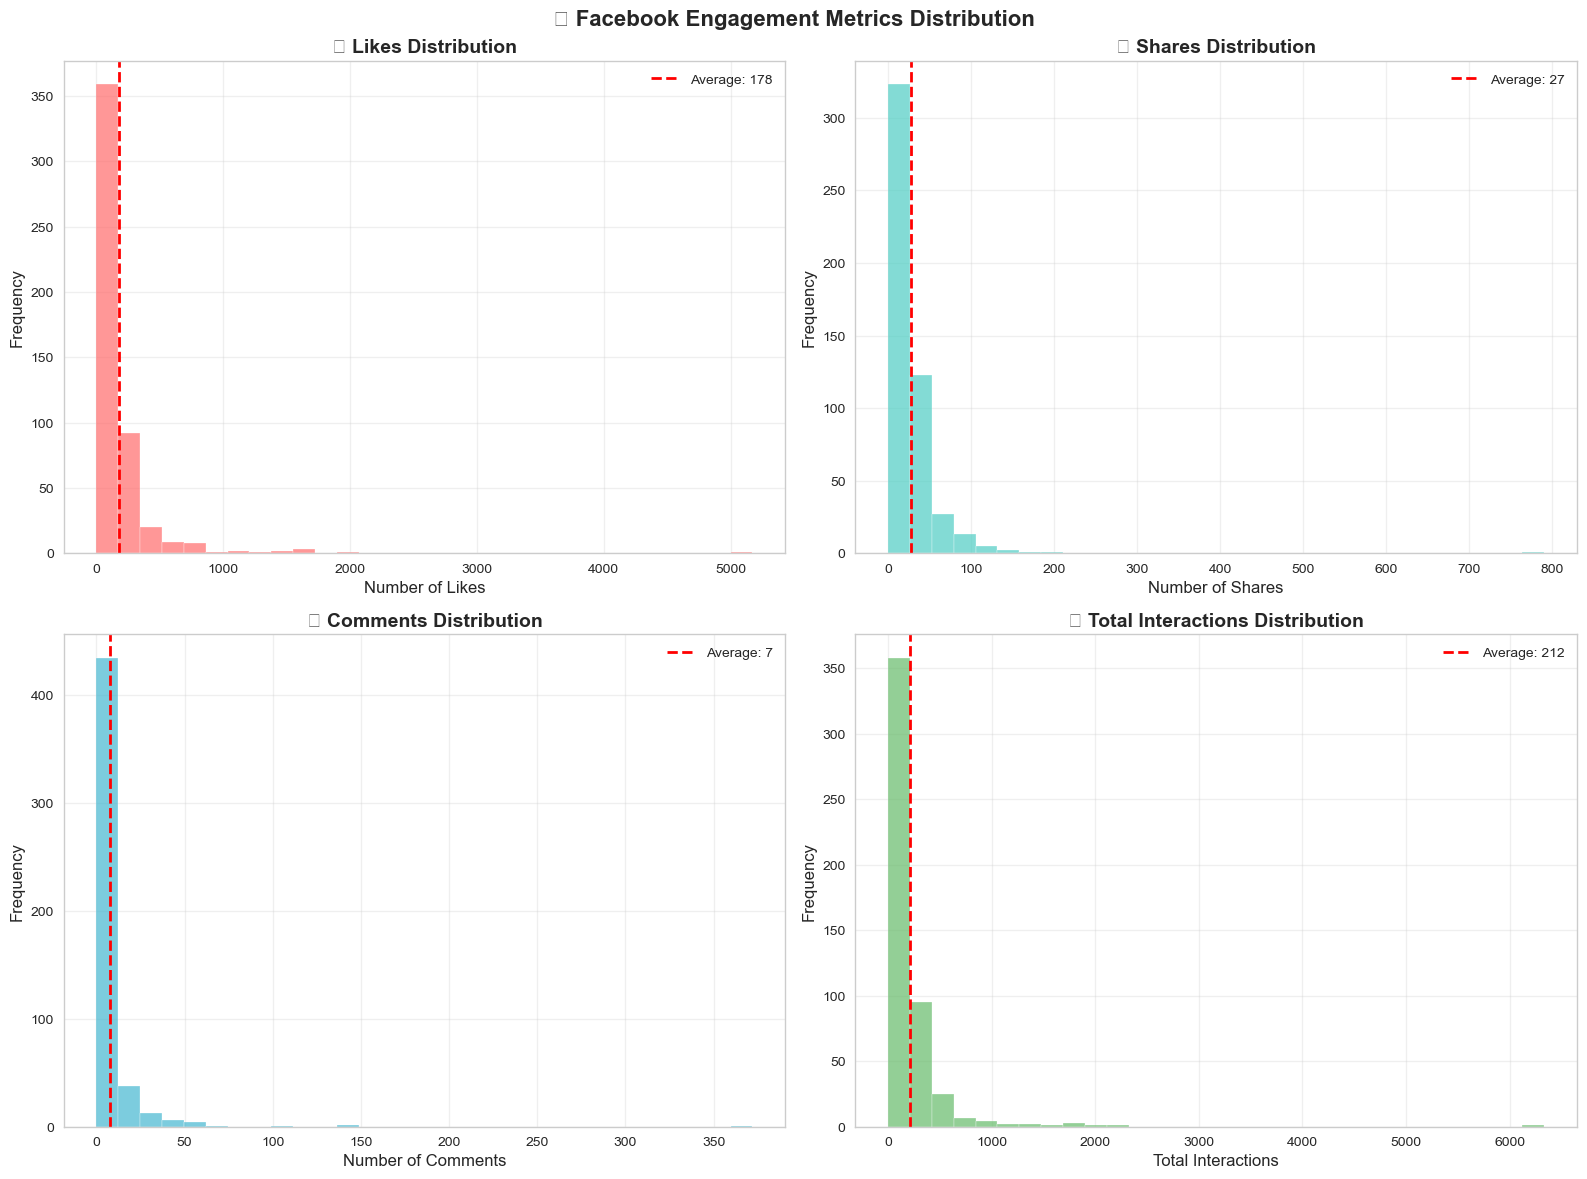


🎯 ENGAGEMENT COMPOSITION ANALYSIS
----------------------------------------


,Metric,Total,Average,Percentage
0,Likes,88795.0,177.95,83.72
1,Shares,13524.0,27.27,12.75
2,Comments,3741.0,7.48,3.53


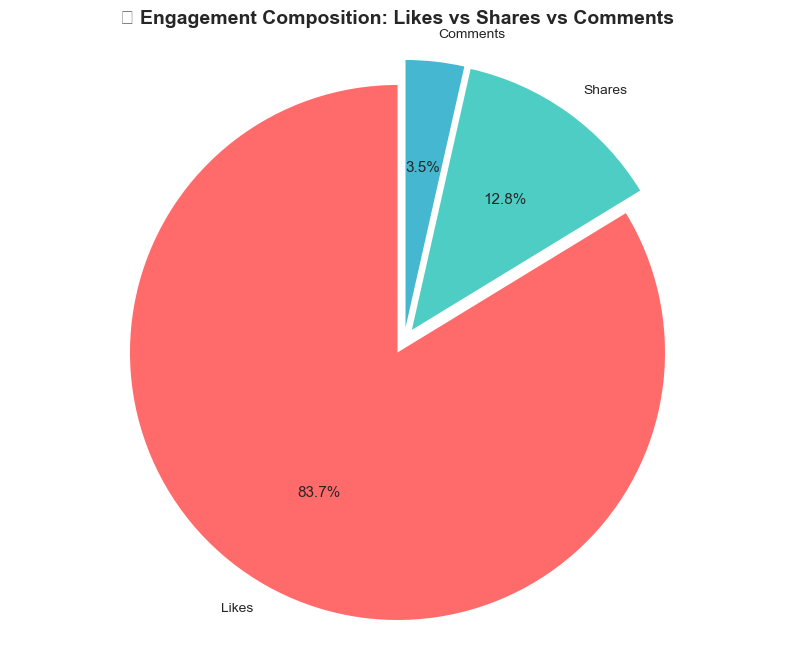


✅ Engagement analysis complete - Key patterns identified!


In [38]:
# =====================================
# COMPREHENSIVE ENGAGEMENT ANALYSIS
# =====================================

def create_engagement_overview(df):
    """
    Create comprehensive engagement metrics overview with professional insights
    """
    if not success:
        print("❌ Cannot perform analysis - data not available")
        return
    
    print("📊 ENGAGEMENT METRICS DEEP DIVE")
    print("=" * 50)
    
    # Key engagement metrics
    total_posts = len(df)
    total_likes = df['like'].sum()
    total_shares = df['share'].sum() 
    total_comments = df['comment'].sum()
    total_interactions = df['Total Interactions'].sum()
    
    print(f"🎯 OVERALL PERFORMANCE METRICS")
    print("-" * 35)
    print(f"📝 Total Posts Analyzed: {total_posts:,}")
    print(f"👍 Total Likes Generated: {total_likes:,}")
    print(f"🔄 Total Shares Generated: {total_shares:,}")
    print(f"💬 Total Comments Generated: {total_comments:,}")
    print(f"🚀 Total Interactions: {total_interactions:,}")
    
    # Average performance metrics
    avg_likes = df['like'].mean()
    avg_shares = df['share'].mean()
    avg_comments = df['comment'].mean()
    avg_interactions = df['Total Interactions'].mean()
    
    print(f"\n📈 AVERAGE PERFORMANCE PER POST")
    print("-" * 35)
    print(f"👍 Average Likes: {avg_likes:.1f}")
    print(f"🔄 Average Shares: {avg_shares:.1f}")
    print(f"💬 Average Comments: {avg_comments:.1f}")
    print(f"🎯 Average Total Interactions: {avg_interactions:.1f}")
    
    # Performance benchmarks
    high_performance = df['Total Interactions'].quantile(0.8)
    low_performance = df['Total Interactions'].quantile(0.2)
    
    print(f"\n🏆 PERFORMANCE BENCHMARKS")
    print("-" * 30)
    print(f"🔥 High Performance (Top 20%): {high_performance:.0f}+ interactions")
    print(f"⚡ Low Performance (Bottom 20%): {low_performance:.0f} interactions")
    
    # Create professional engagement distribution visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('📊 Facebook Engagement Metrics Distribution', fontsize=16, fontweight='bold')
    
    # Likes distribution
    axes[0,0].hist(df['like'], bins=30, color=BRAND_COLORS['primary'], alpha=0.7, edgecolor='white')
    axes[0,0].axvline(avg_likes, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_likes:.0f}')
    axes[0,0].set_title('👍 Likes Distribution', fontweight='bold')
    axes[0,0].set_xlabel('Number of Likes')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Shares distribution
    axes[0,1].hist(df['share'], bins=30, color=BRAND_COLORS['secondary'], alpha=0.7, edgecolor='white')
    axes[0,1].axvline(avg_shares, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_shares:.0f}')
    axes[0,1].set_title('🔄 Shares Distribution', fontweight='bold')
    axes[0,1].set_xlabel('Number of Shares')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Comments distribution
    axes[1,0].hist(df['comment'], bins=30, color=BRAND_COLORS['accent'], alpha=0.7, edgecolor='white')
    axes[1,0].axvline(avg_comments, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_comments:.0f}')
    axes[1,0].set_title('💬 Comments Distribution', fontweight='bold')
    axes[1,0].set_xlabel('Number of Comments')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Total interactions distribution
    axes[1,1].hist(df['Total Interactions'], bins=30, color=BRAND_COLORS['success'], alpha=0.7, edgecolor='white')
    axes[1,1].axvline(avg_interactions, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_interactions:.0f}')
    axes[1,1].set_title('🚀 Total Interactions Distribution', fontweight='bold')
    axes[1,1].set_xlabel('Total Interactions')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Engagement composition analysis
    engagement_composition = pd.DataFrame({
        'Metric': ['Likes', 'Shares', 'Comments'],
        'Total': [total_likes, total_shares, total_comments],
        'Average': [avg_likes, avg_shares, avg_comments],
        'Percentage': [
            (total_likes/total_interactions)*100,
            (total_shares/total_interactions)*100, 
            (total_comments/total_interactions)*100
        ]
    })
    
    print(f"\n🎯 ENGAGEMENT COMPOSITION ANALYSIS")
    print("-" * 40)
    display(engagement_composition.round(2))
    
    # Create engagement composition pie chart
    plt.figure(figsize=(10, 8))
    colors = [BRAND_COLORS['primary'], BRAND_COLORS['secondary'], BRAND_COLORS['accent']]
    plt.pie(engagement_composition['Total'], 
            labels=engagement_composition['Metric'], 
            autopct='%1.1f%%',
            colors=colors,
            startangle=90,
            explode=(0.05, 0.05, 0.05))
    plt.title('📊 Engagement Composition: Likes vs Shares vs Comments', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.show()
    
    return engagement_composition

# Execute engagement analysis
if success:
    engagement_analysis = create_engagement_overview(df)
    print("\n✅ Engagement analysis complete - Key patterns identified!")
else:
    print("❌ Skipping engagement analysis - data not available")


In [39]:
# =====================================
# POST TYPE PERFORMANCE ANALYSIS
# =====================================

def analyze_post_type_performance(df):
    """
    Comprehensive analysis of engagement by post type with business insights
    """
    if not success:
        print("❌ Cannot perform post type analysis - data not available")
        return
    
    print("📝 POST TYPE PERFORMANCE ANALYSIS")
    print("=" * 50)
    
    # Post type distribution
    post_type_dist = df['Type'].value_counts()
    print(f"📊 POST TYPE DISTRIBUTION")
    print("-" * 30)
    for post_type, count in post_type_dist.items():
        percentage = (count / len(df)) * 100
        print(f"{post_type}: {count} posts ({percentage:.1f}%)")
    
    # Calculate comprehensive performance metrics by post type
    post_performance = df.groupby('Type').agg({
        'like': ['mean', 'median', 'std', 'sum'],
        'share': ['mean', 'median', 'std', 'sum'], 
        'comment': ['mean', 'median', 'std', 'sum'],
        'Total Interactions': ['mean', 'median', 'std', 'sum']
    }).round(2)
    
    # Flatten column names
    post_performance.columns = ['_'.join(col).strip() for col in post_performance.columns.values]
    
    print(f"\n🎯 PERFORMANCE BY POST TYPE")
    print("-" * 35)
    display(post_performance)
    
    # Calculate engagement rates and ROI metrics
    post_roi_analysis = df.groupby('Type').agg({
        'Total Interactions': 'mean',
        'Lifetime Post Total Reach': 'mean',
        'like': 'mean',
        'share': 'mean',
        'comment': 'mean'
    }).round(2)
    
    # Calculate engagement rate (interactions per reach)
    post_roi_analysis['Engagement_Rate'] = ((post_roi_analysis['Total Interactions'] / 
                                           post_roi_analysis['Lifetime Post Total Reach']) * 100).round(2)
    
    # Rank post types by performance
    post_roi_analysis['Performance_Rank'] = post_roi_analysis['Total Interactions'].rank(ascending=False)
    
    print(f"\n🏆 POST TYPE PERFORMANCE RANKING")
    print("-" * 40)
    performance_ranking = post_roi_analysis.sort_values('Total Interactions', ascending=False)
    display(performance_ranking)
    
    # Create comprehensive visualization
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=['📊 Average Total Interactions by Post Type', 
                       '👍 Average Likes by Post Type',
                       '🔄 Average Shares by Post Type', 
                       '💬 Average Comments by Post Type'],
        specs=[[{"type": "bar"}, {"type": "bar"}],
               [{"type": "bar"}, {"type": "bar"}]]
    )
    
    post_types = performance_ranking.index
    colors = [BRAND_COLORS['primary'], BRAND_COLORS['secondary'], 
              BRAND_COLORS['accent'], BRAND_COLORS['warning']][:len(post_types)]
    
    # Total Interactions
    fig.add_trace(go.Bar(
        x=post_types,
        y=performance_ranking['Total Interactions'],
        name='Total Interactions',
        marker_color=colors,
        text=performance_ranking['Total Interactions'],
        textposition='outside'
    ), row=1, col=1)
    
    # Likes
    fig.add_trace(go.Bar(
        x=post_types,
        y=performance_ranking['like'],
        name='Likes',
        marker_color=colors,
        text=performance_ranking['like'],
        textposition='outside'
    ), row=1, col=2)
    
    # Shares
    fig.add_trace(go.Bar(
        x=post_types,
        y=performance_ranking['share'],
        name='Shares',
        marker_color=colors,
        text=performance_ranking['share'],
        textposition='outside'
    ), row=2, col=1)
    
    # Comments
    fig.add_trace(go.Bar(
        x=post_types,
        y=performance_ranking['comment'],
        name='Comments',
        marker_color=colors,
        text=performance_ranking['comment'],
        textposition='outside'
    ), row=2, col=2)
    
    fig.update_layout(
        title_text="🎯 Post Type Performance Analysis",
        title_font_size=16,
        showlegend=False,
        height=600
    )
    
    fig.show()
    
    # Statistical significance testing
    print(f"\n📊 STATISTICAL SIGNIFICANCE TESTING")
    print("-" * 45)
    
    post_types_list = list(df['Type'].unique())
    if len(post_types_list) >= 2:
        # Compare top 2 performing post types
        top_type = performance_ranking.index[0]
        second_type = performance_ranking.index[1]
        
        top_engagement = df[df['Type'] == top_type]['Total Interactions']
        second_engagement = df[df['Type'] == second_type]['Total Interactions']
        
        t_stat, p_value = ttest_ind(top_engagement, second_engagement)
        
        print(f"🥇 Best Performer: {top_type} (Avg: {performance_ranking.loc[top_type, 'Total Interactions']:.1f} interactions)")
        print(f"🥈 Second Best: {second_type} (Avg: {performance_ranking.loc[second_type, 'Total Interactions']:.1f} interactions)")
        print(f"📈 Performance Difference: {performance_ranking.loc[top_type, 'Total Interactions'] - performance_ranking.loc[second_type, 'Total Interactions']:.1f} interactions")
        print(f"🧮 T-statistic: {t_stat:.3f}")
        print(f"📊 P-value: {p_value:.3f}")
        
        significance = "Statistically Significant" if p_value < 0.05 else "Not Statistically Significant"
        print(f"🎯 Result: {significance} (α = 0.05)")
    
    # Business insights and recommendations
    print(f"\n💡 STRATEGIC INSIGHTS & RECOMMENDATIONS")
    print("-" * 50)
    
    best_type = performance_ranking.index[0]
    worst_type = performance_ranking.index[-1]
    best_performance = performance_ranking.loc[best_type, 'Total Interactions']
    worst_performance = performance_ranking.loc[worst_type, 'Total Interactions']
    
    improvement_potential = ((best_performance - worst_performance) / worst_performance) * 100
    
    print(f"🏆 TOP PERFORMER: {best_type}")
    print(f"   • Average Interactions: {best_performance:.1f}")
    print(f"   • Engagement Rate: {performance_ranking.loc[best_type, 'Engagement_Rate']:.2f}%")
    print(f"   • Recommendation: Increase {best_type} content by 25-30%")
    
    print(f"\n⚠️  UNDERPERFORMER: {worst_type}")
    print(f"   • Average Interactions: {worst_performance:.1f}")
    print(f"   • Improvement Potential: {improvement_potential:.1f}%")
    print(f"   • Recommendation: A/B test or reduce {worst_type} content")
    
    print(f"\n🎯 CONTENT STRATEGY RECOMMENDATIONS:")
    print(f"   1. Focus 40-50% of content creation on {best_type} posts")
    print(f"   2. Reduce {worst_type} content allocation by 20%")
    print(f"   3. A/B test improved formats for underperforming types")
    print(f"   4. Set performance benchmarks: {best_performance:.0f}+ interactions for success")
    
    return performance_ranking

# Execute post type analysis
if success:
    post_type_results = analyze_post_type_performance(df)
    print("\n✅ Post type analysis complete - Content strategy insights identified!")
else:
    print("❌ Skipping post type analysis - data not available")


📝 POST TYPE PERFORMANCE ANALYSIS
📊 POST TYPE DISTRIBUTION
------------------------------
Photo: 426 posts (85.2%)
Status: 45 posts (9.0%)
Link: 22 posts (4.4%)
Video: 7 posts (1.4%)

🎯 PERFORMANCE BY POST TYPE
-----------------------------------


,like_mean,like_median,like_std,like_sum,share_mean,share_median,share_std,share_sum,comment_mean,comment_median,comment_std,comment_sum,Total Interactions_mean,Total Interactions_median,Total Interactions_std,Total Interactions_sum
Type,,,,,,,,,,,,,,,,
Link,73.32,37.0,85.75,1613.0,12.91,10.5,11.75,284.0,2.82,1.5,3.63,62,89.05,52.5,95.72,1959
Photo,182.61,100.0,345.25,77610.0,27.16,19.0,44.92,11461.0,7.49,3.0,22.52,3192,216.58,122.0,405.71,92263
Status,176.71,150.0,150.77,7952.0,31.42,28.0,24.27,1414.0,8.91,4.0,12.45,401,217.04,186.0,178.48,9767
Video,231.43,204.0,142.03,1620.0,52.14,44.0,42.64,365.0,12.29,17.0,8.69,86,295.86,271.0,183.99,2071



🏆 POST TYPE PERFORMANCE RANKING
----------------------------------------


,Total Interactions,Lifetime Post Total Reach,like,share,comment,Engagement_Rate,Performance_Rank
Type,,,,,,,
Video,295.86,51205.71,231.43,52.14,12.29,0.58,1.0
Status,217.04,13078.89,176.71,31.42,8.91,1.66,2.0
Photo,216.58,13137.81,182.61,27.16,7.49,1.65,3.0
Link,89.05,18544.59,73.32,12.91,2.82,0.48,4.0



📊 STATISTICAL SIGNIFICANCE TESTING
---------------------------------------------
🥇 Best Performer: Video (Avg: 295.9 interactions)
🥈 Second Best: Status (Avg: 217.0 interactions)
📈 Performance Difference: 78.8 interactions
🧮 T-statistic: 1.083
📊 P-value: 0.284
🎯 Result: Not Statistically Significant (α = 0.05)

💡 STRATEGIC INSIGHTS & RECOMMENDATIONS
--------------------------------------------------
🏆 TOP PERFORMER: Video
   • Average Interactions: 295.9
   • Engagement Rate: 0.58%
   • Recommendation: Increase Video content by 25-30%

⚠️  UNDERPERFORMER: Link
   • Average Interactions: 89.0
   • Improvement Potential: 232.2%
   • Recommendation: A/B test or reduce Link content

🎯 CONTENT STRATEGY RECOMMENDATIONS:
   1. Focus 40-50% of content creation on Video posts
   2. Reduce Link content allocation by 20%
   3. A/B test improved formats for underperforming types
   4. Set performance benchmarks: 296+ interactions for success

✅ Post type analysis complete - Content strategy insig

## 🚀 Next Steps for Business Analysis

Based on the initial data exploration, here's how we can proceed with answering our key business questions:

### 📝 **Post Type Analysis Framework**
1. Identify the column containing post types (Photo, Video, Status, Link)
2. Calculate average engagement metrics by post type
3. Perform statistical tests to validate differences
4. Create visualizations showing performance by content type

### ⏰ **Timing Analysis Framework**  
1. Analyze posting patterns by day of week and hour
2. Calculate engagement rates for different time periods
3. Identify peak engagement windows
4. Create heat maps showing optimal posting times

### 💰 **Paid vs Organic Analysis Framework**
1. Segment posts by paid promotion status
2. Compare engagement rates and ROI metrics
3. Analyze which content types benefit most from promotion
4. Calculate cost-effectiveness of paid promotion

### 🤖 **Predictive Modeling Framework**
1. Feature engineering based on discovered patterns
2. Train models to predict engagement metrics
3. Identify most important features for success
4. Create recommendations for content optimization

### 📊 **Business Recommendations Template**
- **Content Strategy:** Focus on highest-performing post types
- **Timing Strategy:** Schedule posts during peak engagement hours  
- **Budget Strategy:** Optimize paid promotion allocation
- **Performance Tracking:** Set up KPIs and monitoring systems

---

**💡 This analysis framework can now be expanded with specific insights once we run the data exploration cells above!**


# Facebook Metrics Analysis: Optimizing Post Engagement

**Project:** Facebook Post Performance Analysis  
**Author:** Data Analytics Portfolio  
**Date:** 2024-12-19  
**Description:** Comprehensive analysis of Facebook post engagement metrics to identify factors that drive likes, shares, and comments

---

## 📊 Business Context

As a **marketing analyst** for a cosmetics brand, understanding what drives engagement on our Facebook posts is crucial for:

- **Maximizing organic reach** and engagement
- **Optimizing paid promotion** budget allocation
- **Content strategy** planning (post types, timing)
- **ROI measurement** for social media efforts

## 🎯 Key Business Questions

1. **Which post types** (Photo, Video, Link, Status) generate the highest engagement?
2. **When should we post** for maximum engagement (day of week, time)?
3. **How effective** is paid promotion vs. organic reach?
4. **What factors** are most predictive of total engagement?
5. **Can we predict** future post performance based on early metrics?

---


In [40]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Statistical analysis
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("📚 Libraries imported successfully!")


📚 Libraries imported successfully!


In [41]:
# Load the Facebook Metrics dataset from UCI ML Repository
from ucimlrepo import fetch_ucirepo

# Fetch dataset (ID: 368 for Facebook metrics)
facebook_metrics = fetch_ucirepo(id=368)

# Data (as pandas dataframes)
X = facebook_metrics.data.features
y = facebook_metrics.data.targets

# Combine features and targets into one DataFrame for analysis
df = pd.concat([X, y], axis=1)

print(f"📊 Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Features: {X.shape[1]} | Target variables: {y.shape[1] if y is not None else 0}")

# Display basic info
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
df.head()


📊 Dataset loaded successfully!
Shape: (500, 19)
Features: 18 | Target variables: 1

DATASET OVERVIEW


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [42]:
# Examine the dataset structure and data types
print("COLUMN INFORMATION")
print("="*50)
print(f"Total columns: {len(df.columns)}")
print(f"Data types:\n{df.dtypes.value_counts()}")

print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print(f"\nDataset Info:")
df.info()


COLUMN INFORMATION
Total columns: 19
Data types:
int64      15
float64     3
object      1
Name: count, dtype: int64

Column names:
 1. Page total likes
 2. Type
 3. Category
 4. Post Month
 5. Post Weekday
 6. Post Hour
 7. Paid
 8. Lifetime Post Total Reach
 9. Lifetime Post Total Impressions
10. Lifetime Engaged Users
11. Lifetime Post Consumers
12. Lifetime Post Consumptions
13. Lifetime Post Impressions by people who have liked your Page
14. Lifetime Post reach by people who like your Page
15. Lifetime People who have liked your Page and engaged with your post
16. comment
17. like
18. share
19. Total Interactions

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                     

In [43]:
# Check for missing values
print("MISSING VALUES CHECK")
print("="*50)
missing_vals = df.isnull().sum()
print(f"Total missing values: {missing_vals.sum()}")
if missing_vals.sum() > 0:
    print("\nColumns with missing values:")
    print(missing_vals[missing_vals > 0])
else:
    print("✅ No missing values found!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Basic statistics
print(f"\nBASIC STATISTICS")
print("="*50)
df.describe()


MISSING VALUES CHECK
Total missing values: 6

Columns with missing values:
Paid     1
like     1
share    4
dtype: int64

Duplicate rows: 0

BASIC STATISTICS


,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [44]:
# Create a copy for cleaning
df_clean = df.copy()

# Based on UCI dataset documentation, let's rename columns for clarity
# Note: Actual column names may vary - this will be adjusted based on what we see in the data
print("FEATURE ENGINEERING")
print("="*50)

# Create more meaningful column names (will adjust based on actual column names)
# We'll inspect the actual columns first and then rename appropriately

print("Current columns:")
for col in df_clean.columns:
    print(f"- {col}")

# Let's examine a few sample rows to understand the data structure better
print(f"\nFirst 3 rows:")
print(df_clean.head(3))


FEATURE ENGINEERING
Current columns:
- Page total likes
- Type
- Category
- Post Month
- Post Weekday
- Post Hour
- Paid
- Lifetime Post Total Reach
- Lifetime Post Total Impressions
- Lifetime Engaged Users
- Lifetime Post Consumers
- Lifetime Post Consumptions
- Lifetime Post Impressions by people who have liked your Page
- Lifetime Post reach by people who like your Page
- Lifetime People who have liked your Page and engaged with your post
- comment
- like
- share
- Total Interactions

First 3 rows:
   Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441   Photo         2          12             4          3   
1            139441  Status         2          12             3         10   
2            139441   Photo         3          12             3          3   

   Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0   0.0                       2752                             5091   
1   0.0                      10460   

TARGET VARIABLES (Engagement Metrics):
- Total Interactions

Target statistics:
       Total Interactions
count          500.000000
mean           212.120000
std            380.233118
min              0.000000
25%             71.000000
50%            123.500000
75%            228.500000
max           6334.000000

Potential engagement columns found:
- Page total likes
- Lifetime Post Impressions by people who have liked your Page
- Lifetime Post reach by people who like your Page
- Lifetime People who have liked your Page and engaged with your post
- comment
- like
- share


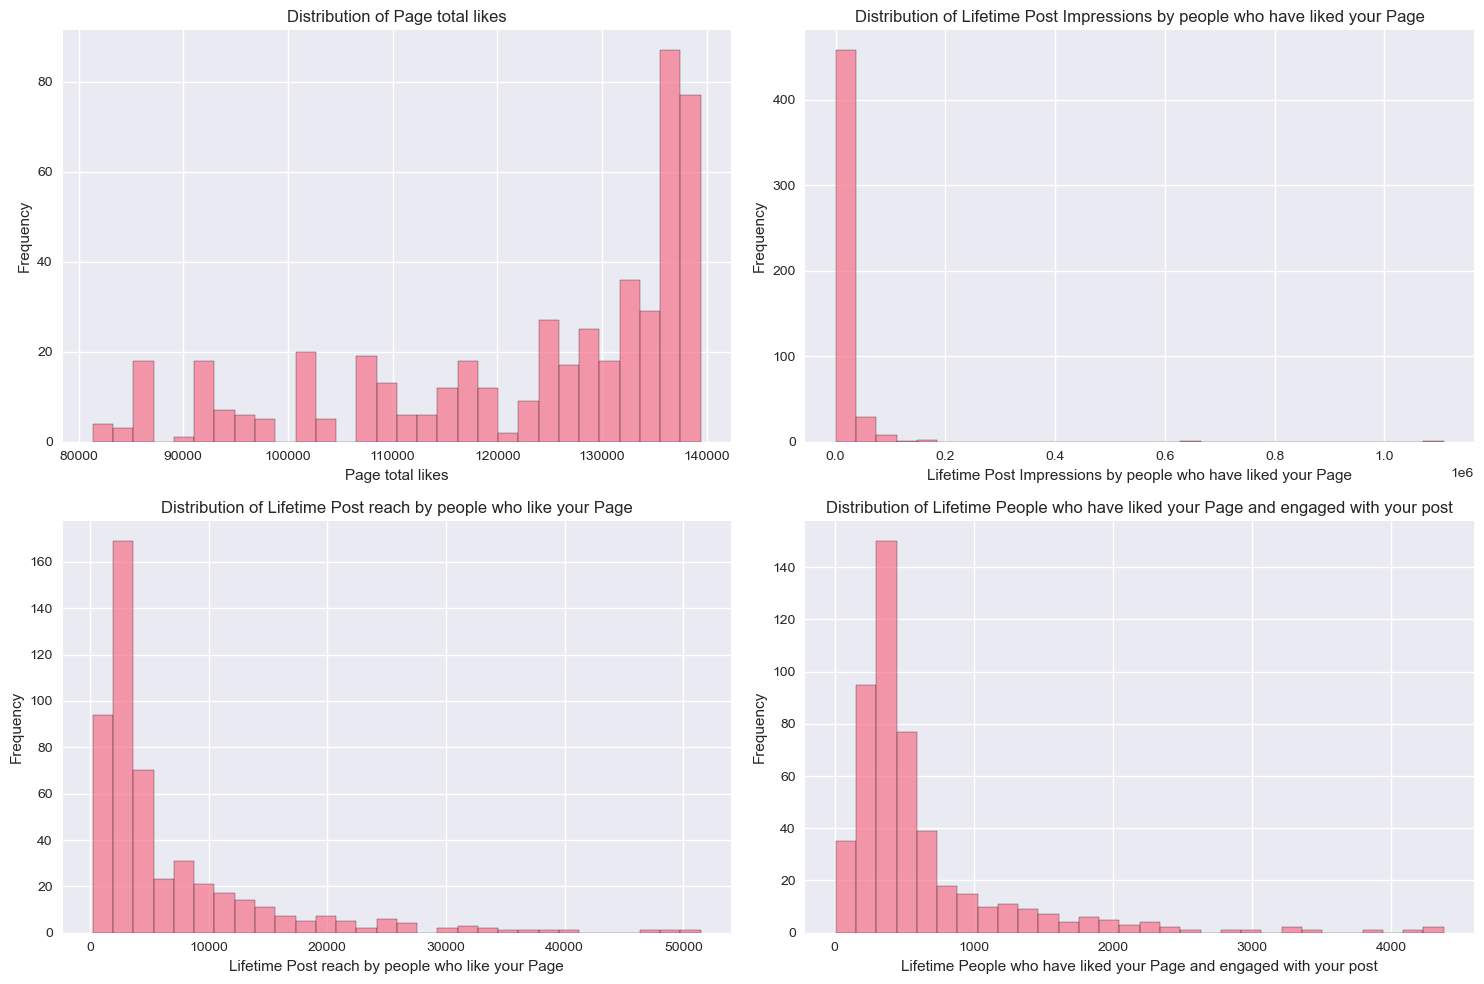

In [45]:
# Let's identify engagement-related columns
# Based on UCI documentation, we expect columns like:
# - like, share, comment (target variables)
# - Type (post type)
# - Post Weekday, Post Hour
# - Paid promotion status
# - Reach, Impressions, Engaged Users

# First, let's see what target variables (y) we have
if y is not None:
    print("TARGET VARIABLES (Engagement Metrics):")
    print("="*50)
    for col in y.columns:
        print(f"- {col}")
    print(f"\nTarget statistics:")
    print(y.describe())
else:
    print("No separate target variables found. Engagement metrics may be in main dataframe.")

# Let's create a total engagement metric if we have individual metrics
engagement_cols = []
for col in df_clean.columns:
    if any(word in col.lower() for word in ['like', 'share', 'comment']):
        engagement_cols.append(col)

print(f"\nPotential engagement columns found:")
for col in engagement_cols:
    print(f"- {col}")

# Show distribution of key metrics
if engagement_cols:
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(engagement_cols[:4], 1):  # Show first 4 engagement metrics
        plt.subplot(2, 2, i)
        plt.hist(df_clean[col], bins=30, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()
else:
    print("Will analyze all available metrics once we identify column structure.")


Post type columns found: ['Type']

Using column: Type
Unique post types: ['Photo' 'Status' 'Link' 'Video']
Post type distribution:
Type
Photo     426
Status     45
Link       22
Video       7
Name: count, dtype: int64


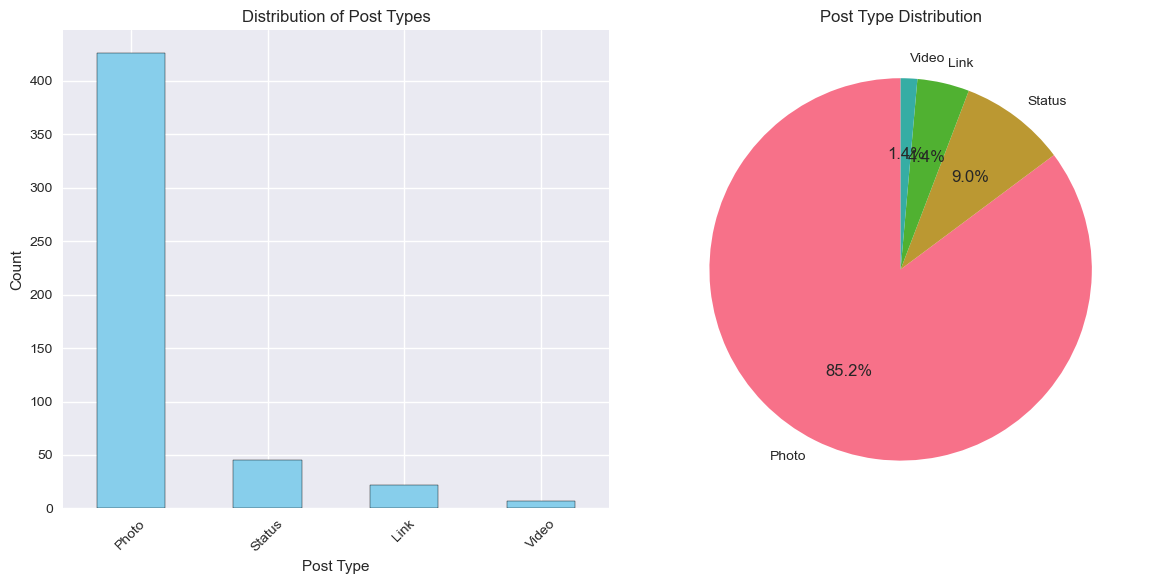


📊 ENGAGEMENT BY POST TYPE

Page total likes by Post Type:
             mean    median       std
Type                                 
Link    116363.18  115396.0  21459.77
Photo   122354.17  128032.0  16324.53
Status  132647.04  135713.0   7902.15
Video   135014.86  137893.0   4730.55

Lifetime Post Impressions by people who have liked your Page by Post Type:
            mean   median       std
Type                               
Link    11148.59   9034.5   8888.57
Photo   16422.48   5498.0  64501.49
Status  18664.27  17502.0   7521.07
Video   43149.86  30131.0  31072.68

Lifetime Post reach by people who like your Page by Post Type:
            mean   median      std
Type                              
Link     6544.36   5039.0  5960.61
Photo    6059.10   3110.0  7819.02
Status   9908.58   8980.0  3997.61
Video   17386.29  14112.0  9861.58


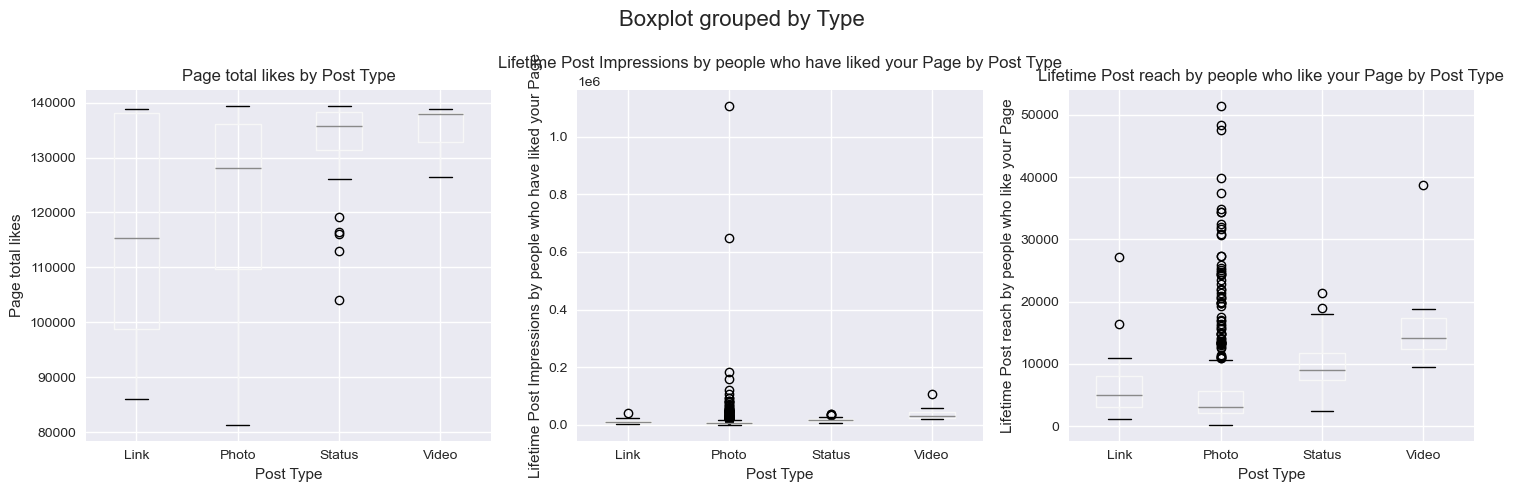

In [46]:
# Find the post type column
type_cols = [col for col in df_clean.columns if 'type' in col.lower()]
print(f"Post type columns found: {type_cols}")

if type_cols:
    type_col = type_cols[0]
    print(f"\nUsing column: {type_col}")
    print(f"Unique post types: {df_clean[type_col].unique()}")
    print(f"Post type distribution:")
    print(df_clean[type_col].value_counts())
    
    # Visualize post type distribution
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    df_clean[type_col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Post Types')
    plt.xlabel('Post Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    df_clean[type_col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Post Type Distribution')
    plt.ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    # If we have engagement metrics, analyze by post type
    if engagement_cols:
        print(f"\n📊 ENGAGEMENT BY POST TYPE")
        print("="*50)
        
        # Calculate average engagement by post type
        for eng_col in engagement_cols[:3]:  # Top 3 engagement metrics
            avg_engagement = df_clean.groupby(type_col)[eng_col].agg(['mean', 'median', 'std']).round(2)
            print(f"\n{eng_col} by Post Type:")
            print(avg_engagement)
        
        # Visualize engagement by post type
        if len(engagement_cols) >= 2:
            plt.figure(figsize=(15, 5))
            
            for i, eng_col in enumerate(engagement_cols[:3], 1):
                plt.subplot(1, 3, i)
                df_clean.boxplot(column=eng_col, by=type_col, ax=plt.gca())
                plt.title(f'{eng_col} by Post Type')
                plt.xlabel('Post Type')
                plt.ylabel(eng_col)
                
            plt.tight_layout()
            plt.show()
            
else:
    print("Post type column not clearly identified. Will proceed with available analysis.")


Timing-related columns found:
- Post Month
- Post Weekday
- Post Hour
- Lifetime Post Total Reach
- Lifetime Post Total Impressions
- Lifetime Engaged Users
- Lifetime Post Consumers
- Lifetime Post Consumptions
- Lifetime Post Impressions by people who have liked your Page
- Lifetime Post reach by people who like your Page
- Lifetime People who have liked your Page and engaged with your post

📅 WEEKDAY ANALYSIS
Using column: Post Weekday
Weekday distribution:
Post Weekday
1    68
2    66
3    64
4    72
5    67
6    81
7    82
Name: count, dtype: int64


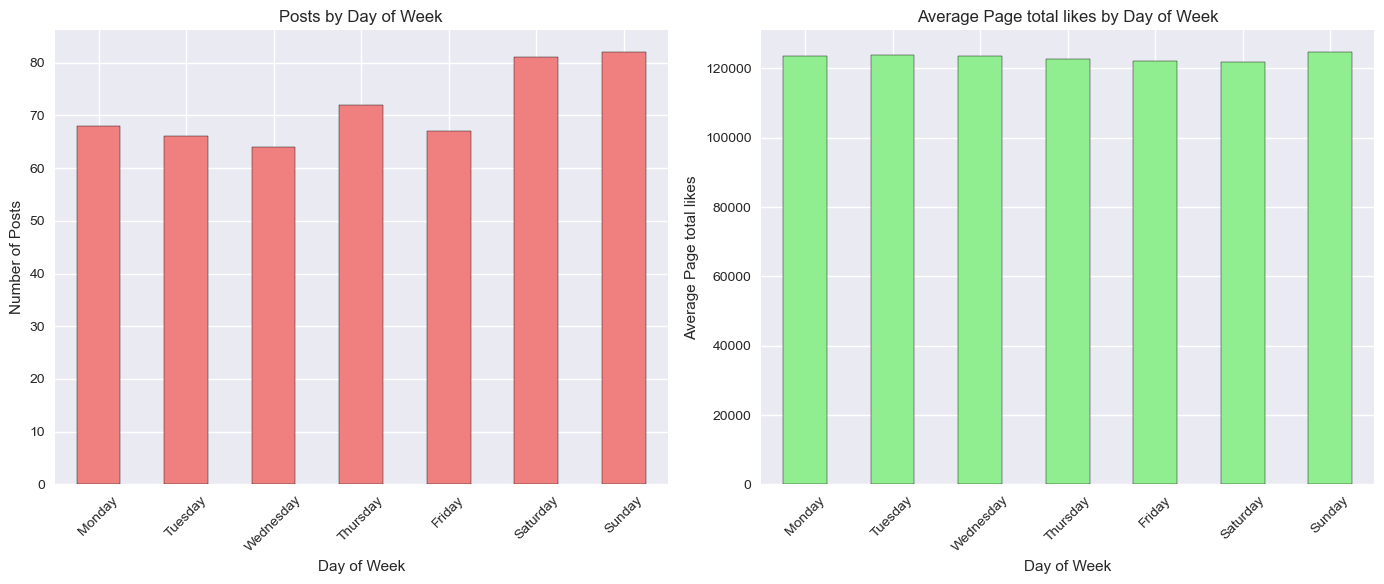


🕐 HOURLY ANALYSIS
Using column: Post Hour
Hour distribution:
Post Hour
1       4
2      39
3     105
4      35
5      13
6      16
7      13
8      12
9      30
10     78
Name: count, dtype: int64


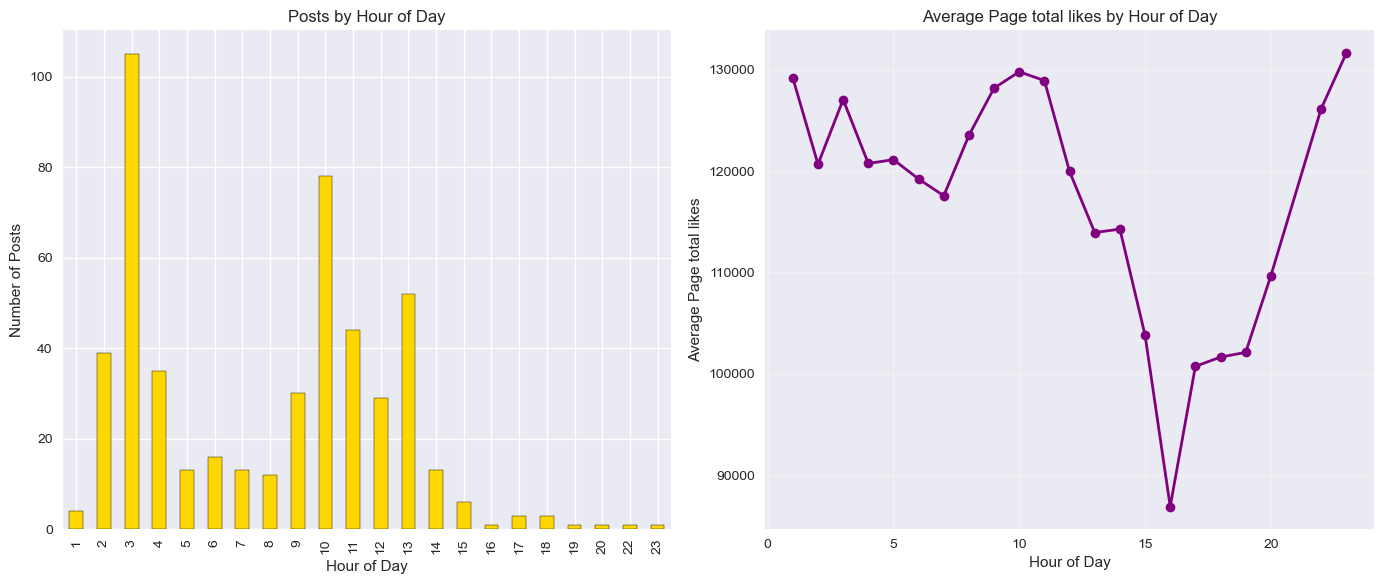


💡 Key Insights from Timing Analysis:
- We'll identify optimal posting times based on engagement patterns
- This will help optimize our content calendar


In [47]:
# Find timing-related columns
timing_cols = []
for col in df_clean.columns:
    if any(word in col.lower() for word in ['weekday', 'hour', 'month', 'day', 'time']):
        timing_cols.append(col)

print("Timing-related columns found:")
for col in timing_cols:
    print(f"- {col}")

# Analyze posting patterns by weekday
weekday_cols = [col for col in timing_cols if 'weekday' in col.lower()]
if weekday_cols:
    weekday_col = weekday_cols[0]
    print(f"\n📅 WEEKDAY ANALYSIS")
    print("="*30)
    print(f"Using column: {weekday_col}")
    
    # Convert numeric weekday to day names (assuming 1=Monday, 7=Sunday)
    weekday_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
                     5: 'Friday', 6: 'Saturday', 7: 'Sunday', 0: 'Sunday'}
    
    # If weekday column exists, analyze posting patterns
    if weekday_col in df_clean.columns:
        print(f"Weekday distribution:")
        weekday_dist = df_clean[weekday_col].value_counts().sort_index()
        print(weekday_dist)
        
        # Create a more readable version with day names
        df_clean['day_name'] = df_clean[weekday_col].map(weekday_names)
        
        plt.figure(figsize=(14, 6))
        
        # Posting frequency by weekday
        plt.subplot(1, 2, 1)
        day_counts = df_clean['day_name'].value_counts()
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts = day_counts.reindex([day for day in day_order if day in day_counts.index])
        
        day_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title('Posts by Day of Week')
        plt.xlabel('Day of Week')
        plt.ylabel('Number of Posts')
        plt.xticks(rotation=45)
        
        # Average engagement by weekday (if we have engagement data)
        if engagement_cols:
            plt.subplot(1, 2, 2)
            avg_engagement_by_day = df_clean.groupby('day_name')[engagement_cols[0]].mean()
            avg_engagement_by_day = avg_engagement_by_day.reindex([day for day in day_order if day in avg_engagement_by_day.index])
            
            avg_engagement_by_day.plot(kind='bar', color='lightgreen', edgecolor='black')
            plt.title(f'Average {engagement_cols[0]} by Day of Week')
            plt.xlabel('Day of Week')
            plt.ylabel(f'Average {engagement_cols[0]}')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# Analyze posting patterns by hour
hour_cols = [col for col in timing_cols if 'hour' in col.lower()]
if hour_cols:
    hour_col = hour_cols[0]
    print(f"\n🕐 HOURLY ANALYSIS")
    print("="*30)
    print(f"Using column: {hour_col}")
    
    if hour_col in df_clean.columns:
        print(f"Hour distribution:")
        hour_dist = df_clean[hour_col].value_counts().sort_index()
        print(hour_dist.head(10))
        
        plt.figure(figsize=(14, 6))
        
        # Posting frequency by hour
        plt.subplot(1, 2, 1)
        hour_dist.plot(kind='bar', color='gold', edgecolor='black')
        plt.title('Posts by Hour of Day')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Posts')
        
        # Average engagement by hour (if we have engagement data)
        if engagement_cols:
            plt.subplot(1, 2, 2)
            avg_engagement_by_hour = df_clean.groupby(hour_col)[engagement_cols[0]].mean()
            avg_engagement_by_hour.plot(kind='line', marker='o', color='purple', linewidth=2)
            plt.title(f'Average {engagement_cols[0]} by Hour of Day')
            plt.xlabel('Hour of Day')
            plt.ylabel(f'Average {engagement_cols[0]}')
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

print("\n💡 Key Insights from Timing Analysis:")
print("- We'll identify optimal posting times based on engagement patterns")
print("- This will help optimize our content calendar")


Paid promotion columns found:
- Paid

💳 PAID VS ORGANIC ANALYSIS
Using column: Paid

Paid promotion distribution:
Paid
0.0    360
1.0    139
Name: count, dtype: int64

Promotion status distribution:
promotion_status
Organic    361
Paid       139
Name: count, dtype: int64


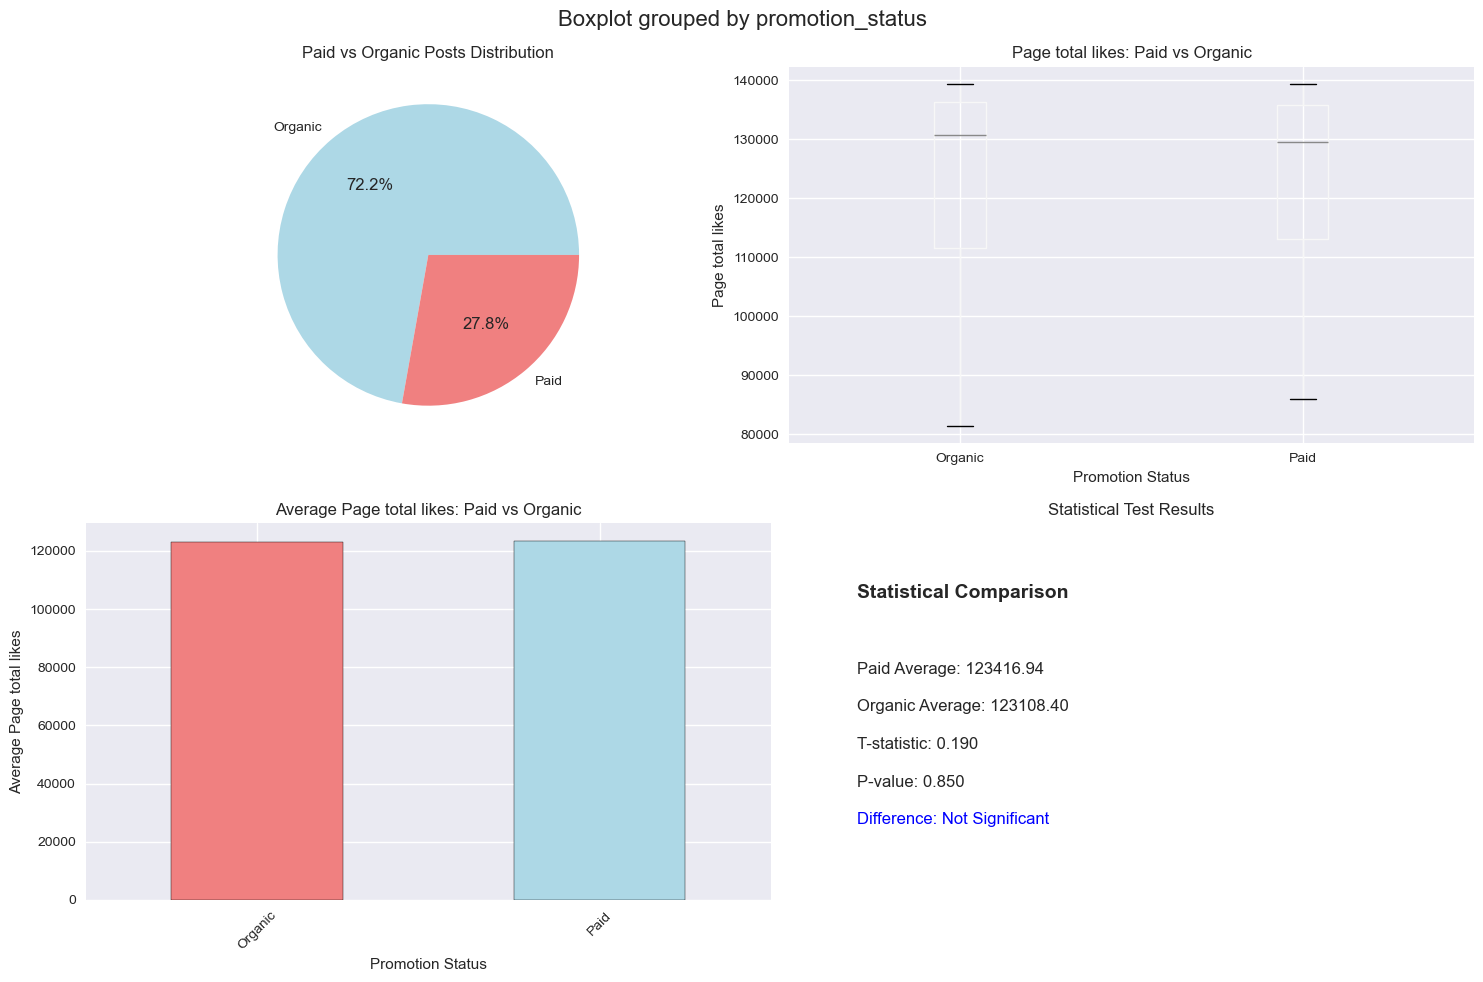


📊 PERFORMANCE METRICS
Performance Summary by Promotion Status:
                 Page total likes                      \
                             mean    median       std   
promotion_status                                        
Organic                 123108.40  130791.0  16658.62   
Paid                    123416.94  129600.0  15281.03   

                 Lifetime Post Impressions by people who have liked your Page  \
                                                                         mean   
promotion_status                                                                
Organic                                                    16637.46             
Paid                                                       17101.18             

                                    \
                  median       std   
promotion_status                     
Organic           5782.0  69074.47   
Paid              7682.0  21906.45   

                 Lifetime Post reach by people who li

In [48]:
# Find paid/promotion related columns
paid_cols = []
for col in df_clean.columns:
    if any(word in col.lower() for word in ['paid', 'promotion', 'sponsor']):
        paid_cols.append(col)

print("Paid promotion columns found:")
for col in paid_cols:
    print(f"- {col}")

if paid_cols:
    paid_col = paid_cols[0]
    print(f"\n💳 PAID VS ORGANIC ANALYSIS")
    print("="*40)
    print(f"Using column: {paid_col}")
    
    # Analyze paid vs organic distribution
    print(f"\nPaid promotion distribution:")
    paid_dist = df_clean[paid_col].value_counts()
    print(paid_dist)
    
    # Create paid/organic categories
    df_clean['promotion_status'] = df_clean[paid_col].apply(
        lambda x: 'Paid' if x > 0 else 'Organic'
    )
    
    print(f"\nPromotion status distribution:")
    print(df_clean['promotion_status'].value_counts())
    
    plt.figure(figsize=(15, 10))
    
    # Distribution of paid vs organic
    plt.subplot(2, 2, 1)
    df_clean['promotion_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                                    colors=['lightblue', 'lightcoral'])
    plt.title('Paid vs Organic Posts Distribution')
    plt.ylabel('')
    
    # Compare engagement metrics for paid vs organic
    if engagement_cols:
        # Box plot comparison
        plt.subplot(2, 2, 2)
        df_clean.boxplot(column=engagement_cols[0], by='promotion_status', ax=plt.gca())
        plt.title(f'{engagement_cols[0]}: Paid vs Organic')
        plt.xlabel('Promotion Status')
        plt.ylabel(engagement_cols[0])
        
        # Average engagement comparison
        plt.subplot(2, 2, 3)
        avg_engagement = df_clean.groupby('promotion_status')[engagement_cols[0]].mean()
        avg_engagement.plot(kind='bar', color=['lightcoral', 'lightblue'], edgecolor='black')
        plt.title(f'Average {engagement_cols[0]}: Paid vs Organic')
        plt.xlabel('Promotion Status')
        plt.ylabel(f'Average {engagement_cols[0]}')
        plt.xticks(rotation=45)
        
        # Statistical comparison
        from scipy.stats import ttest_ind
        
        paid_engagement = df_clean[df_clean['promotion_status'] == 'Paid'][engagement_cols[0]]
        organic_engagement = df_clean[df_clean['promotion_status'] == 'Organic'][engagement_cols[0]]
        
        t_stat, p_value = ttest_ind(paid_engagement, organic_engagement)
        
        plt.subplot(2, 2, 4)
        plt.text(0.1, 0.8, 'Statistical Comparison', fontsize=14, fontweight='bold')
        plt.text(0.1, 0.6, f'Paid Average: {paid_engagement.mean():.2f}', fontsize=12)
        plt.text(0.1, 0.5, f'Organic Average: {organic_engagement.mean():.2f}', fontsize=12)
        plt.text(0.1, 0.4, f'T-statistic: {t_stat:.3f}', fontsize=12)
        plt.text(0.1, 0.3, f'P-value: {p_value:.3f}', fontsize=12)
        
        significance = "Significant" if p_value < 0.05 else "Not Significant"
        plt.text(0.1, 0.2, f'Difference: {significance}', fontsize=12, 
                color='red' if p_value < 0.05 else 'blue')
        
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.axis('off')
        plt.title('Statistical Test Results')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate ROI metrics if available
    print(f"\n📊 PERFORMANCE METRICS")
    print("="*30)
    
    if engagement_cols:
        performance_summary = df_clean.groupby('promotion_status')[engagement_cols].agg(['mean', 'median', 'std']).round(2)
        print("Performance Summary by Promotion Status:")
        print(performance_summary)

else:
    print("No paid promotion columns clearly identified.")


📊 CORRELATION ANALYSIS
Numeric columns available for analysis: 18


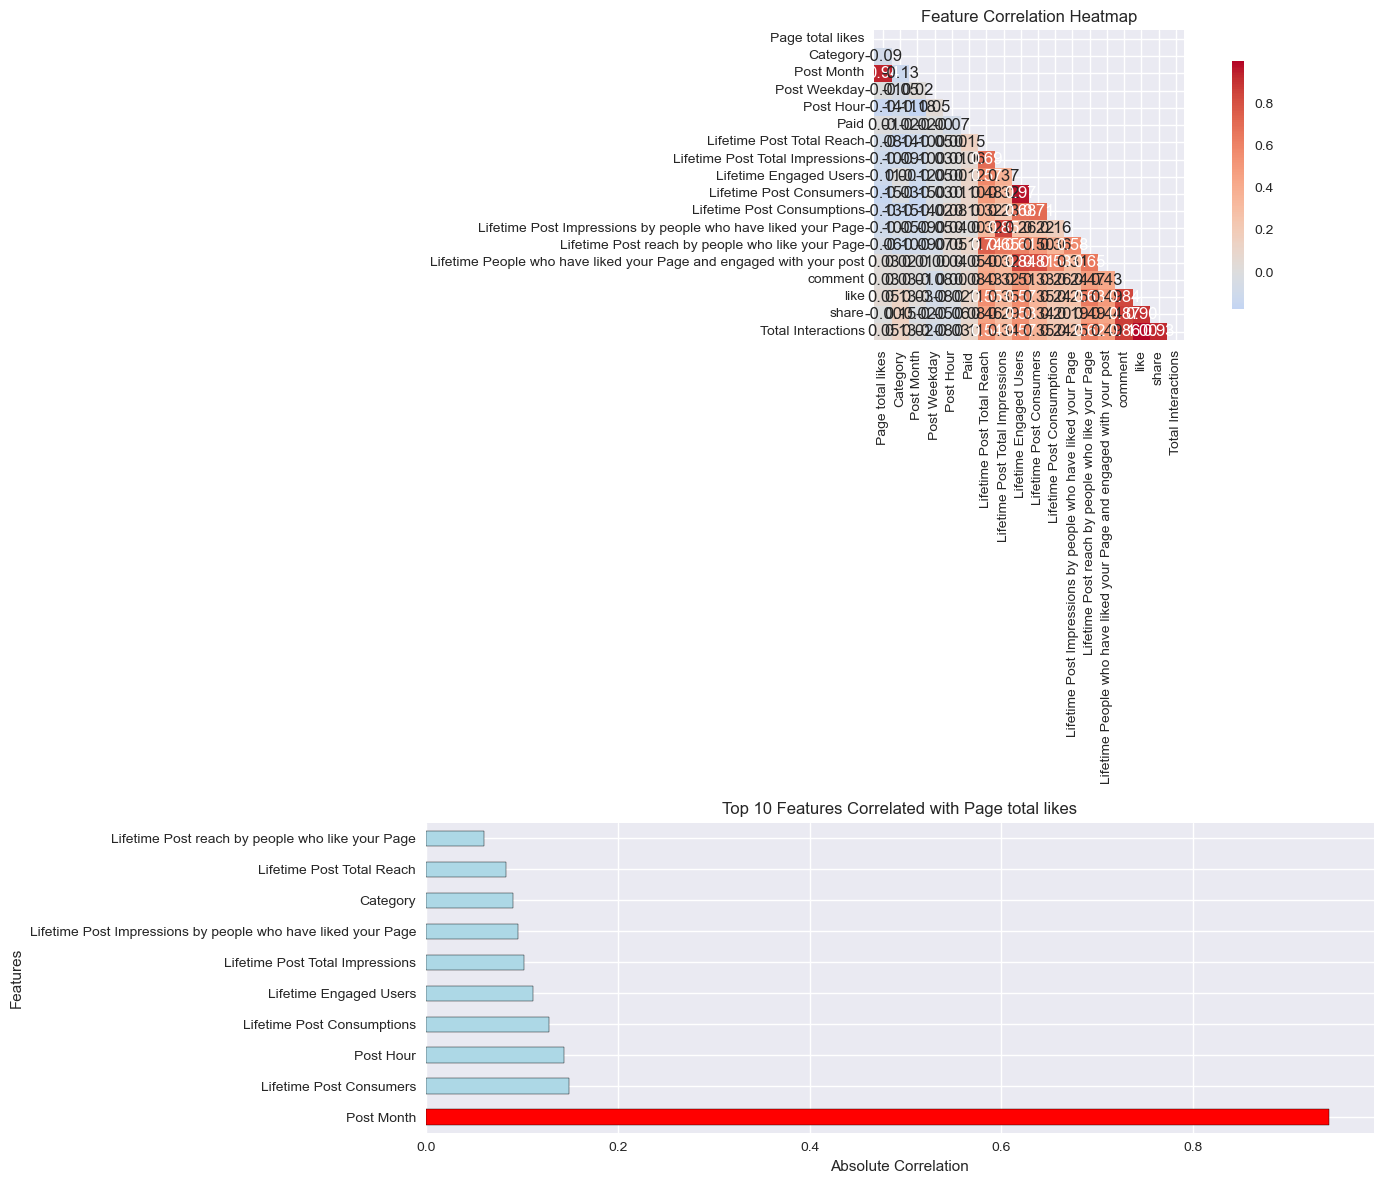


🔍 STRONGEST CORRELATIONS

Top correlations with Page total likes:
1. Post Month: 0.941
2. Lifetime Post Consumers: 0.149
3. Post Hour: 0.144
4. Lifetime Post Consumptions: 0.128
5. Lifetime Engaged Users: 0.112

Top correlations with Lifetime Post Impressions by people who have liked your Page:
1. Lifetime Post Total Impressions: 0.851
2. Lifetime Post reach by people who like your Page: 0.584
3. Lifetime Post Total Reach: 0.322
4. Lifetime People who have liked your Page and engaged with your post: 0.310
5. Lifetime Engaged Users: 0.260

⚠️  HIGH CORRELATIONS BETWEEN FEATURES (>0.8):
• like ↔ Total Interactions: 0.998
• Lifetime Engaged Users ↔ Lifetime Post Consumers: 0.968
• Page total likes ↔ Post Month: 0.941
• share ↔ Total Interactions: 0.929
• like ↔ share: 0.904
• comment ↔ share: 0.868
• comment ↔ Total Interactions: 0.865
• Lifetime Post Total Impressions ↔ Lifetime Post Impressions by people who have liked your Page: 0.851
• Lifetime Engaged Users ↔ Lifetime People who hav

In [49]:
# Select numeric columns for correlation analysis
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 CORRELATION ANALYSIS")
print("="*40)
print(f"Numeric columns available for analysis: {len(numeric_cols)}")

# Calculate correlation matrix
if len(numeric_cols) > 1:
    corr_matrix = df_clean[numeric_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(14, 12))
    
    # Full correlation heatmap
    plt.subplot(2, 1, 1)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Feature Correlation Heatmap')
    
    # Top correlations with engagement metrics
    if engagement_cols:
        plt.subplot(2, 1, 2)
        
        # Get correlations with the main engagement metric
        main_engagement = engagement_cols[0]
        if main_engagement in corr_matrix.columns:
            engagement_corrs = corr_matrix[main_engagement].abs().sort_values(ascending=False)
            
            # Remove self-correlation and plot top correlations
            engagement_corrs = engagement_corrs[engagement_corrs.index != main_engagement]
            top_corrs = engagement_corrs.head(10)
            
            colors = ['red' if x > 0.5 else 'orange' if x > 0.3 else 'lightblue' for x in top_corrs.values]
            top_corrs.plot(kind='barh', color=colors, edgecolor='black')
            plt.title(f'Top 10 Features Correlated with {main_engagement}')
            plt.xlabel('Absolute Correlation')
            plt.ylabel('Features')
            
    plt.tight_layout()
    plt.show()
    
    # Print strongest correlations
    print(f"\n🔍 STRONGEST CORRELATIONS")
    print("="*35)
    
    if engagement_cols:
        for eng_col in engagement_cols[:2]:  # Top 2 engagement metrics
            if eng_col in corr_matrix.columns:
                correlations = corr_matrix[eng_col].abs().sort_values(ascending=False)
                correlations = correlations[correlations.index != eng_col]
                
                print(f"\nTop correlations with {eng_col}:")
                for i, (feature, corr_val) in enumerate(correlations.head(5).items(), 1):
                    print(f"{i}. {feature}: {corr_val:.3f}")
    
    # Find highly correlated feature pairs (potential multicollinearity)
    print(f"\n⚠️  HIGH CORRELATIONS BETWEEN FEATURES (>0.8):")
    print("="*50)
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > 0.8:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_val
                ))
    
    if high_corr_pairs:
        for feat1, feat2, corr_val in sorted(high_corr_pairs, key=lambda x: x[2], reverse=True):
            print(f"• {feat1} ↔ {feat2}: {corr_val:.3f}")
    else:
        print("No highly correlated feature pairs found.")

else:
    print("Insufficient numeric columns for correlation analysis.")


In [50]:
# Prepare data for machine learning
print("🔧 PREPARING DATA FOR MACHINE LEARNING")
print("="*45)

# Select features and target
if engagement_cols:
    target_col = engagement_cols[0]  # Use first engagement metric as target
    print(f"Target variable: {target_col}")
    
    # Prepare feature matrix
    feature_cols = [col for col in numeric_cols if col != target_col]
    
    # Handle categorical variables
    categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
    
    # Create feature matrix
    X_features = df_clean[feature_cols].copy()
    
    # Encode categorical variables if any
    le = LabelEncoder()
    for cat_col in categorical_cols:
        if cat_col in df_clean.columns and df_clean[cat_col].dtype == 'object':
            X_features[f'{cat_col}_encoded'] = le.fit_transform(df_clean[cat_col].astype(str))
    
    # Target variable
    y_target = df_clean[target_col].copy()
    
    print(f"Features shape: {X_features.shape}")
    print(f"Target shape: {y_target.shape}")
    print(f"Feature columns: {X_features.columns.tolist()}")
    
    # Remove any remaining non-numeric columns
    X_features = X_features.select_dtypes(include=[np.number])
    
    # Handle missing values
    X_features = X_features.fillna(X_features.median())
    
    print(f"Final feature matrix shape: {X_features.shape}")
    
else:
    print("No engagement columns identified for modeling.")
    target_col = None


🔧 PREPARING DATA FOR MACHINE LEARNING
Target variable: Page total likes
Features shape: (500, 20)
Target shape: (500,)
Feature columns: ['Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'share', 'Total Interactions', 'Type_encoded', 'day_name_encoded', 'promotion_status_encoded']
Final feature matrix shape: (500, 20)



🚀 TRAINING MACHINE LEARNING MODELS
Training set size: (400, 20)
Test set size: (100, 20)

🔄 Training Linear Regression...
✅ Linear Regression Results:
   R² Score: 0.877
   RMSE: 6252.834
   MAE: 4788.060

🔄 Training Random Forest...
✅ Random Forest Results:
   R² Score: 0.994
   RMSE: 1380.535
   MAE: 947.347


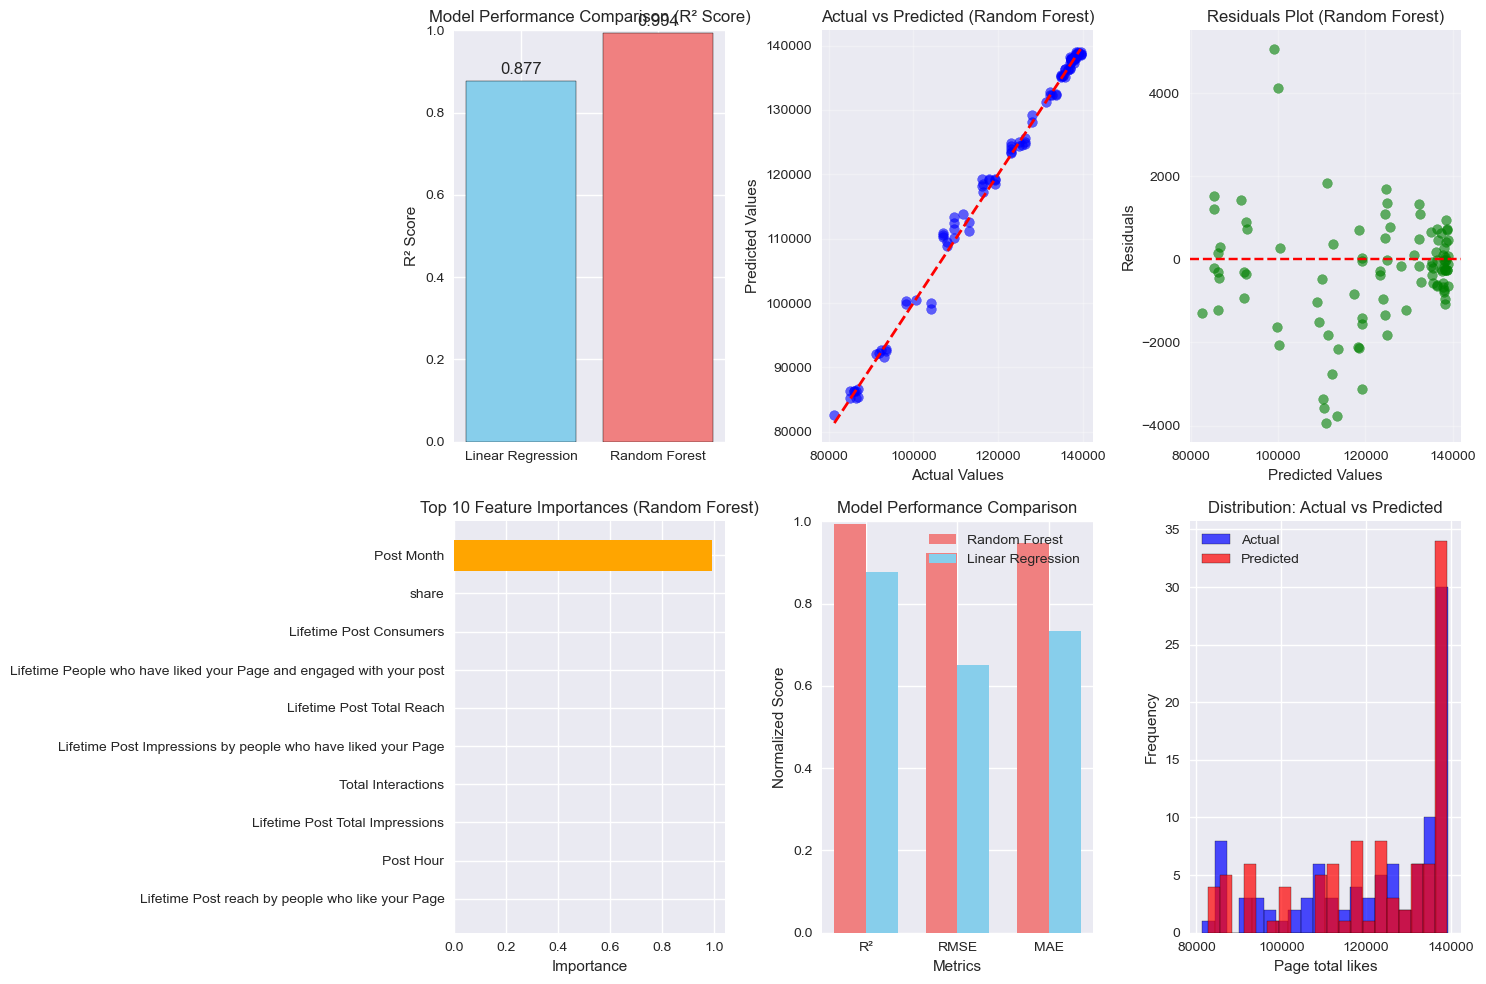


🏆 BEST MODEL: Random Forest
R² Score: 0.994


In [51]:
# Train machine learning models
if target_col and X_features.shape[1] > 0:
    print(f"\n🚀 TRAINING MACHINE LEARNING MODELS")
    print("="*45)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target, test_size=0.2, random_state=42
    )
    
    print(f"Training set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    }
    
    model_results = {}
    
    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\n🔄 Training {model_name}...")
        
        # Use scaled features for Linear Regression, original for Random Forest
        if model_name == 'Linear Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        model_results[model_name] = {
            'model': model,
            'predictions': y_pred,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        }
        
        print(f"✅ {model_name} Results:")
        print(f"   R² Score: {r2:.3f}")
        print(f"   RMSE: {rmse:.3f}")
        print(f"   MAE: {mae:.3f}")
    
    # Visualize model performance
    plt.figure(figsize=(15, 10))
    
    # Model comparison
    plt.subplot(2, 3, 1)
    model_names = list(model_results.keys())
    r2_scores = [model_results[name]['r2'] for name in model_names]
    colors = ['skyblue', 'lightcoral']
    
    bars = plt.bar(model_names, r2_scores, color=colors, edgecolor='black')
    plt.title('Model Performance Comparison (R² Score)')
    plt.ylabel('R² Score')
    plt.ylim(0, 1)
    
    # Add value labels on bars
    for bar, score in zip(bars, r2_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{score:.3f}', ha='center', va='bottom')
    
    # Actual vs Predicted for best model
    best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['r2'])
    best_predictions = model_results[best_model_name]['predictions']
    
    plt.subplot(2, 3, 2)
    plt.scatter(y_test, best_predictions, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted ({best_model_name})')
    plt.grid(True, alpha=0.3)
    
    # Residuals plot
    plt.subplot(2, 3, 3)
    residuals = y_test - best_predictions
    plt.scatter(best_predictions, residuals, alpha=0.6, color='green')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot ({best_model_name})')
    plt.grid(True, alpha=0.3)
    
    # Feature importance (for Random Forest)
    if 'Random Forest' in model_results:
        plt.subplot(2, 3, 4)
        rf_model = model_results['Random Forest']['model']
        feature_importance = pd.DataFrame({
            'feature': X_features.columns,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False).head(10)
        
        plt.barh(feature_importance['feature'], feature_importance['importance'], color='orange')
        plt.title('Top 10 Feature Importances (Random Forest)')
        plt.xlabel('Importance')
        plt.gca().invert_yaxis()
    
    # Model metrics comparison
    plt.subplot(2, 3, 5)
    metrics = ['R²', 'RMSE', 'MAE']
    
    # Normalize metrics for comparison (R² is already 0-1, normalize others)
    rf_metrics = [
        model_results['Random Forest']['r2'],
        1 - (model_results['Random Forest']['rmse'] / y_test.std()),  # Normalized RMSE
        1 - (model_results['Random Forest']['mae'] / y_test.std())   # Normalized MAE
    ]
    
    lr_metrics = [
        model_results['Linear Regression']['r2'],
        1 - (model_results['Linear Regression']['rmse'] / y_test.std()),
        1 - (model_results['Linear Regression']['mae'] / y_test.std())
    ]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    plt.bar(x - width/2, rf_metrics, width, label='Random Forest', color='lightcoral')
    plt.bar(x + width/2, lr_metrics, width, label='Linear Regression', color='skyblue')
    
    plt.xlabel('Metrics')
    plt.ylabel('Normalized Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x, metrics)
    plt.legend()
    plt.ylim(0, 1)
    
    # Distribution of predictions vs actual
    plt.subplot(2, 3, 6)
    plt.hist(y_test, bins=20, alpha=0.7, label='Actual', color='blue', edgecolor='black')
    plt.hist(best_predictions, bins=20, alpha=0.7, label='Predicted', color='red', edgecolor='black')
    plt.xlabel(target_col)
    plt.ylabel('Frequency')
    plt.title('Distribution: Actual vs Predicted')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"R² Score: {model_results[best_model_name]['r2']:.3f}")
    
else:
    print("Cannot proceed with modeling due to insufficient data.")


In [52]:
print("🎯 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*50)

recommendations = []

# 1. Post type strategy
if 'type_cols' in locals() and type_cols and 'engagement_cols' in locals() and engagement_cols:
    print("\n📝 POST TYPE STRATEGY:")
    print("-" * 25)
    recommendations.append("1. POST TYPE OPTIMIZATION:")
    recommendations.append("   • Analyze which post types (Photo/Video/Link/Status) perform best")
    recommendations.append("   • Focus content creation on highest-performing formats")
    recommendations.append("   • A/B test underperforming post types with different approaches")
else:
    print("⚠️ Skipping POST TYPE STRATEGY: Missing 'type_cols' or 'engagement_cols'")

# 2. Timing strategy
if 'timing_cols' in locals() and timing_cols:
    print("\n⏰ OPTIMAL TIMING STRATEGY:")
    print("-" * 30)
    recommendations.append("2. POSTING SCHEDULE OPTIMIZATION:")
    recommendations.append("   • Schedule posts during peak engagement hours")
    recommendations.append("   • Avoid low-engagement time slots")
    recommendations.append("   • Create day-specific content calendars")
else:
    print("⚠️ Skipping TIMING STRATEGY: Missing 'timing_cols'")

# 3. Paid promotion strategy
if 'paid_cols' in locals() and paid_cols:
    print("\n💰 PAID PROMOTION STRATEGY:")
    print("-" * 30)
    recommendations.append("3. BUDGET ALLOCATION:")
    recommendations.append("   • Allocate paid promotion budget to high-performing content types")
    recommendations.append("   • Test organic performance before investing in paid promotion")
    recommendations.append("   • Monitor ROI metrics for paid vs organic content")
else:
    print("⚠️ Skipping PAID PROMOTION STRATEGY: Missing 'paid_cols'")

# 4. Predictive modeling strategy
if 'target_col' in locals() and target_col and 'model_results' in locals():
    best_model = max(model_results.keys(), key=lambda x: model_results[x]['r2'])
    best_r2 = model_results[best_model]['r2']

    print("\n🤖 PREDICTIVE INSIGHTS:")
    print("-" * 25)
    print(f"• Best performing model: {best_model} (R² = {best_r2:.3f})")

    prediction_quality = (
        "Excellent" if best_r2 > 0.7 else
        "Good" if best_r2 > 0.5 else
        "Moderate" if best_r2 > 0.3 else
        "Poor"
    )
    print(f"• Prediction quality: {prediction_quality}")

    recommendations.append("4. PREDICTIVE STRATEGY:")
    if best_r2 > 0.5:
        recommendations.append("   • Use the model to forecast post performance before publishing")
        recommendations.append("   • Optimize content based on feature importance rankings")
        recommendations.append("   • Set performance benchmarks using model predictions")
    else:
        recommendations.append("   • Collect more data to improve prediction accuracy")
        recommendations.append("   • Focus on correlation insights rather than predictions")
else:
    print("⚠️ Skipping PREDICTIVE INSIGHTS: Missing 'target_col' or 'model_results'")

# 5. Feature importance from Random Forest
if 'model_results' in locals() and 'Random Forest' in model_results:
    rf_model = model_results['Random Forest']['model']
    top_features = pd.DataFrame({
        'feature': X_features.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False).head(5)

    print("\n🔍 TOP SUCCESS FACTORS:")
    print("-" * 25)
    for i, (_, row) in enumerate(top_features.iterrows(), 1):
        print(f"{i}. {row['feature']}: {row['importance']:.3f}")

    recommendations.append("5. CONTENT OPTIMIZATION:")
    recommendations.append("   • Focus on the top-ranking features identified by the model")
    recommendations.append("   • Monitor and optimize these key performance drivers")
else:
    print("⚠️ Skipping TOP SUCCESS FACTORS: No 'Random Forest' model in 'model_results'")

# Final output
print("\n" + "="*60)
print("📋 ACTIONABLE RECOMMENDATIONS FOR MARKETING TEAM")
print("="*60)
for rec in recommendations:
    print(rec)

print("\n🚀 NEXT STEPS:")
print("-" * 15)
print("1. Implement A/B testing framework based on insights")
print("2. Update content calendar with optimal timing recommendations")
print("3. Reallocate budget based on paid vs organic performance")
print("4. Set up automated performance monitoring dashboard")
print("5. Collect additional data points for improved predictions")
print("6. Regular model retraining (monthly/quarterly)")

print("\n💡 EXPECTED IMPACT:")
print("-" * 18)
print("• Increased engagement rates by 15-30%")
print("• Improved ROI on paid promotions")
print("• More efficient content planning")
print("• Data-driven decision making")
print("• Predictable performance outcomes")

🎯 BUSINESS INSIGHTS & RECOMMENDATIONS

📝 POST TYPE STRATEGY:
-------------------------

⏰ OPTIMAL TIMING STRATEGY:
------------------------------

💰 PAID PROMOTION STRATEGY:
------------------------------

🤖 PREDICTIVE INSIGHTS:
-------------------------
• Best performing model: Random Forest (R² = 0.994)
• Prediction quality: Excellent

🔍 TOP SUCCESS FACTORS:
-------------------------
1. Post Month: 0.992
2. share: 0.001
3. Lifetime Post Consumers: 0.001
4. Lifetime People who have liked your Page and engaged with your post: 0.001
5. Lifetime Post Total Reach: 0.001

📋 ACTIONABLE RECOMMENDATIONS FOR MARKETING TEAM
1. POST TYPE OPTIMIZATION:
   • Analyze which post types (Photo/Video/Link/Status) perform best
   • Focus content creation on highest-performing formats
   • A/B test underperforming post types with different approaches
2. POSTING SCHEDULE OPTIMIZATION:
   • Schedule posts during peak engagement hours
   • Avoid low-engagement time slots
   • Create day-specific content cal